In [1]:
import os
import pandas as pd

In [7]:
df = pd.read_csv("D:\\BCU Final\\ML\\Dataset\\NON EEG\\mergeddata\\merged_data1.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46229 entries, 0 to 46228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hour        46229 non-null  float64
 1   Minute      46229 non-null  float64
 2   Second      46229 non-null  float64
 3   HeartRate   46229 non-null  float64
 4   SpO2        46229 non-null  float64
 5   Label       46229 non-null  object 
 6   Subject ID  46229 non-null  object 
 7   Index       46229 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.8+ MB


In [4]:
import numpy as np

In [8]:
df['Index'] = df['Subject ID'].astype(str) + df['Hour'].astype(int).astype(str) + df['Minute'].astype(int).astype(str) + df['Second'].astype(int).astype(str)

total_data = df.sort_values(['Subject ID', 'Hour', 'Minute', 'Second'])
total_data.Label = total_data.Label.str.replace('Relax1', 'Relax')
total_data = total_data.reset_index()
total_data.drop('Index', axis=1, inplace=True)



In [9]:
df

,Hour,Minute,Second,HeartRate,SpO2,Label,Subject ID,Index
0,15.0,8.0,28.0,96.0,97.0,Relax,Subject 10,Subject 1015828
1,15.0,8.0,29.0,96.0,96.0,Relax,Subject 10,Subject 1015829
2,15.0,8.0,30.0,97.0,96.0,Relax,Subject 10,Subject 1015830
3,15.0,8.0,31.0,96.0,96.0,Relax,Subject 10,Subject 1015831
4,15.0,8.0,32.0,96.0,96.0,Relax,Subject 10,Subject 1015832
...,...,...,...,...,...,...,...,...
46224,14.0,53.0,51.0,74.0,95.0,Relax,Subject 9,Subject 9145351
46225,14.0,53.0,52.0,74.0,95.0,Relax,Subject 9,Subject 9145352
46226,14.0,53.0,53.0,74.0,95.0,Relax,Subject 9,Subject 9145353
46227,14.0,53.0,54.0,74.0,95.0,Relax,Subject 9,Subject 9145354


In [17]:
grouped_data = df.groupby(['Subject ID','Second', 'Label'])

# Calculate the mean, median, standard deviation, minimum, and maximum values for 'SpO2' and 'HeartRate'
features = grouped_data.agg({
    'SpO2': ['mean', 'median', 'std', 'min', 'max'],
    'HeartRate': ['mean', 'median', 'std', 'min', 'max']
})

# Flatten the column names
features.columns = [''.join(col) for col in features.columns]

# Reset the index
features = features.reset_index()

# Print the resulting DataFrame
print(features)


     Subject ID  Second            Label   SpO2mean  SpO2median   SpO2std  \
0     Subject 1     0.0  CognitiveStress  96.000000        96.0  0.894427   
1     Subject 1     0.0  EmotionalStress  94.833333        95.0  0.408248   
2     Subject 1     0.0   PhysicalStress  96.166667        96.0  0.408248   
3     Subject 1     0.0            Relax  95.500000        96.0  0.688247   
4     Subject 1     1.0  CognitiveStress  95.833333        96.0  0.752773   
...         ...     ...              ...        ...         ...       ...   
4795  Subject 9    58.0            Relax  94.950000        95.0  0.825578   
4796  Subject 9    59.0  CognitiveStress  96.333333        96.0  1.032796   
4797  Subject 9    59.0  EmotionalStress  95.857143        96.0  0.690066   
4798  Subject 9    59.0   PhysicalStress  95.800000        97.0  2.167948   
4799  Subject 9    59.0            Relax  95.142857        95.0  1.108409   

      SpO2min  SpO2max  HeartRatemean  HeartRatemedian  HeartRatestd  \
0  

In [78]:
import numpy as np

# Define aggregation functions
agg_functions = {
    'SpO2': [np.mean, np.median, np.std, np.min, np.max],
    'HeartRate': [np.mean, np.median, np.std, np.min, np.max]
}

# Group by 'Subject ID' and 'Label' and apply aggregation functions
features = df.groupby(['Subject ID', 'Label']).agg(agg_functions)

# Flatten the multi-level column index
features.columns = ['{}_{}'.format(col, func) for col, func in features.columns]

# Reset the index to convert the grouped columns into individual columns
features = features.reset_index()

# Print the resulting DataFrame
print(features)


    Subject ID            Label  SpO2_mean  SpO2_median  SpO2_std  SpO2_amin  \
0    Subject 1  CognitiveStress  96.197260         96.0  0.729664       95.0   
1    Subject 1  EmotionalStress  95.616915         95.0  0.828129       94.0   
2    Subject 1   PhysicalStress  96.416413         96.0  0.780774       95.0   
3    Subject 1            Relax  95.639235         96.0  0.853411       93.0   
4   Subject 10  CognitiveStress  96.727528         97.0  0.577928       95.0   
..         ...              ...        ...          ...       ...        ...   
75   Subject 8            Relax  95.114713         95.0  0.371812       94.0   
76   Subject 9  CognitiveStress  95.619718         96.0  1.880364       89.0   
77   Subject 9  EmotionalStress  96.022444         96.0  1.063953       93.0   
78   Subject 9   PhysicalStress  95.118902         96.0  2.032129       90.0   
79   Subject 9            Relax  94.864505         95.0  0.690387       93.0   

    SpO2_amax  HeartRate_mean  HeartRat

In [77]:
features = df.copy()

# Calculate the mean, median, maximum, and minimum values for 'SpO2' and 'HeartRate'
features['SpO2Mean'] = features['SpO2'].mean()
features['SpO2Median'] = features['SpO2'].median()
features['SpO2Std'] = features['SpO2'].std()
features['SpO2Min'] = features['SpO2'].min()
features['SpO2Max'] = features['SpO2'].max()

features['HeartRateMean'] = features['HeartRate'].mean()
features['HeartRateMedian'] = features['HeartRate'].median()
features['HeartRateStd'] = features['HeartRate'].std()
features['HeartRateMin'] = features['HeartRate'].min()
features['HeartRateMax'] = features['HeartRate'].max()

# Print the resulting DataFrame
print(features)


       Hour  Minute  Second  HeartRate  SpO2  Label  Subject ID  \
0      15.0     8.0    28.0       96.0  97.0  Relax  Subject 10   
1      15.0     8.0    29.0       96.0  96.0  Relax  Subject 10   
2      15.0     8.0    30.0       97.0  96.0  Relax  Subject 10   
3      15.0     8.0    31.0       96.0  96.0  Relax  Subject 10   
4      15.0     8.0    32.0       96.0  96.0  Relax  Subject 10   
...     ...     ...     ...        ...   ...    ...         ...   
46224  14.0    53.0    51.0       74.0  95.0  Relax   Subject 9   
46225  14.0    53.0    52.0       74.0  95.0  Relax   Subject 9   
46226  14.0    53.0    53.0       74.0  95.0  Relax   Subject 9   
46227  14.0    53.0    54.0       74.0  95.0  Relax   Subject 9   
46228  14.0    53.0    55.0       73.0  94.0  Relax   Subject 9   

                 Index   SpO2Mean  SpO2Median  SpO2Std  SpO2Min  SpO2Max  \
0      Subject 1015828  95.932834        96.0  1.71246     80.0    100.0   
1      Subject 1015829  95.932834        96

In [84]:
df['SpO2Mean'] = df['SpO2'].mean()
df['SpO2Median'] = df['SpO2'].median()
df['SpO2Max'] = df['SpO2'].max()
df['SpO2Min'] = df['SpO2'].min()

df['HeartRateMean'] = df['HeartRate'].mean()
df['HeartRateMedian'] = df['HeartRate'].median()
df['HeartRateMax'] = df['HeartRate'].max()
df['HeartRateMin'] = df['HeartRate'].min()


In [11]:
features

,Label,SpO2mean,SpO2median,SpO2std,SpO2min,SpO2max,HeartRatemean,HeartRatemedian,HeartRatestd,HeartRatemin,HeartRatemax
0,CognitiveStress,96.786106,97.0,1.386882,89.0,100.0,82.071860,80.0,13.799408,53.0,130.0
1,EmotionalStress,96.193124,96.0,1.562892,89.0,99.0,73.709375,72.0,12.103700,50.0,124.0
2,PhysicalStress,95.083117,96.0,2.730420,80.0,100.0,95.836516,97.0,14.603527,57.0,134.0
3,Relax,95.819543,96.0,1.313587,90.0,99.0,72.112516,71.0,12.316241,48.0,127.0


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\pojit\AppData\Local\Temp\ipykernel_37896\2877421546.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = X.corr()


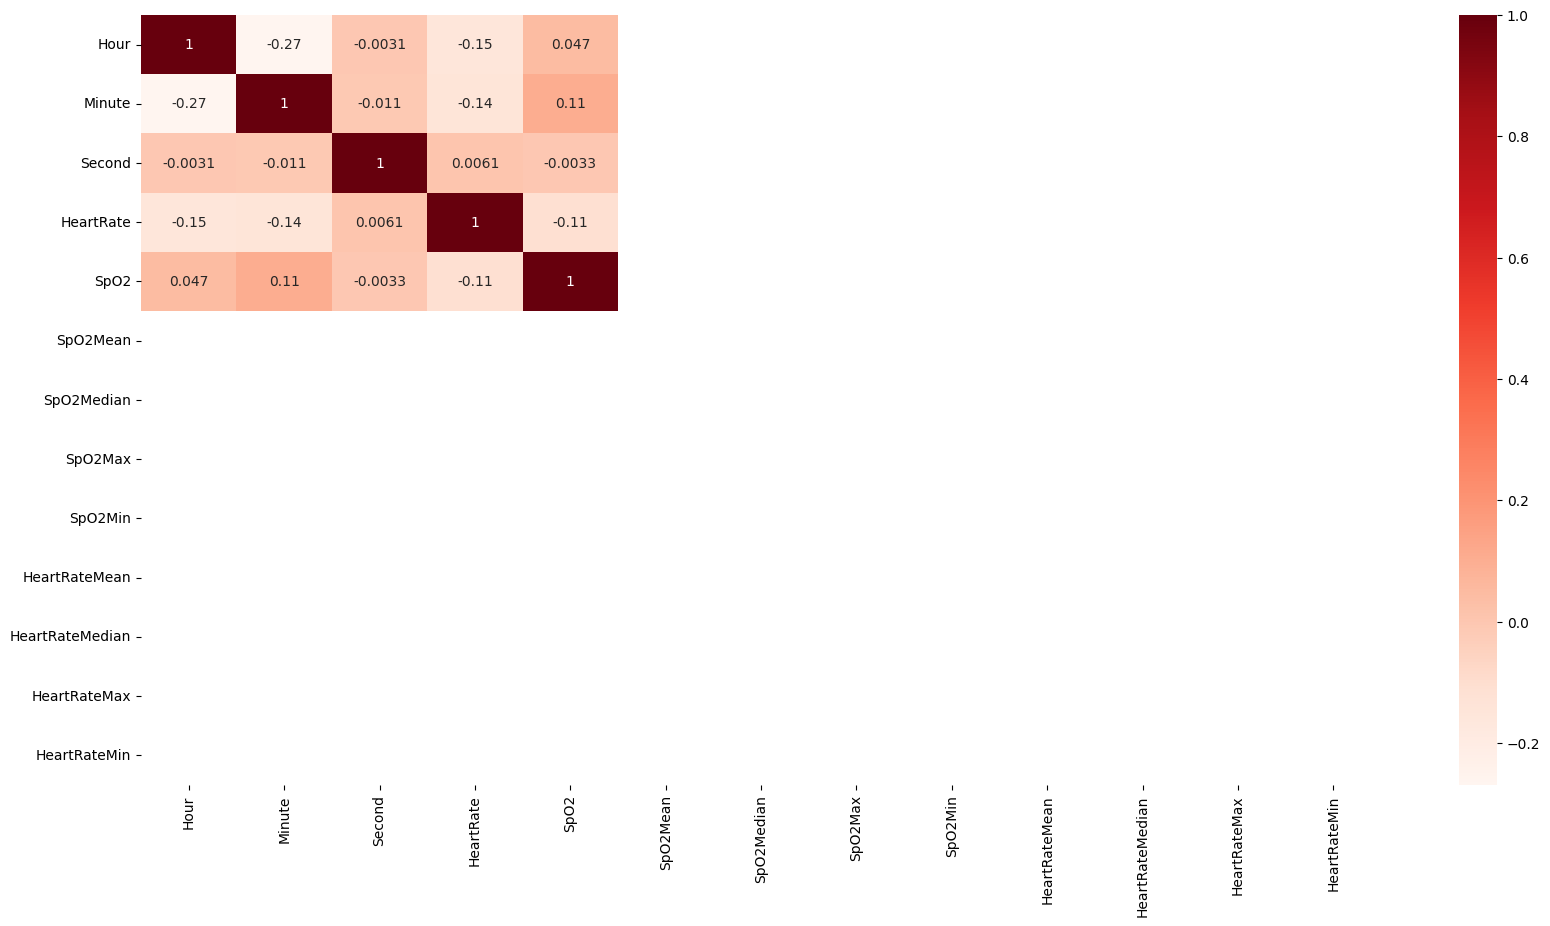

                     Hour    Minute    Second  HeartRate      SpO2  SpO2Mean  \
Hour             1.000000 -0.269225 -0.003118  -0.153322  0.047360       NaN   
Minute          -0.269225  1.000000 -0.010657  -0.144406  0.106782       NaN   
Second          -0.003118 -0.010657  1.000000   0.006111 -0.003322       NaN   
HeartRate       -0.153322 -0.144406  0.006111   1.000000 -0.109005       NaN   
SpO2             0.047360  0.106782 -0.003322  -0.109005  1.000000       NaN   
SpO2Mean              NaN       NaN       NaN        NaN       NaN       NaN   
SpO2Median            NaN       NaN       NaN        NaN       NaN       NaN   
SpO2Max               NaN       NaN       NaN        NaN       NaN       NaN   
SpO2Min               NaN       NaN       NaN        NaN       NaN       NaN   
HeartRateMean         NaN       NaN       NaN        NaN       NaN       NaN   
HeartRateMedian       NaN       NaN       NaN        NaN       NaN       NaN   
HeartRateMax          NaN       NaN     

C:\Users\pojit\AppData\Local\Temp\ipykernel_37896\2877421546.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = X.corr()


In [90]:
features.Label = features.Label.str.replace('Relax1', 'Relax')

X = df.drop('Label', axis=1)
X = X.drop('Subject ID', axis=1)

cor = X.corr()
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

correlations = X.corr()
print(correlations)

In [40]:
unique_spo2 = df['SpO2'].unique()
unique_heart_rate = df['HeartRate'].unique()

print("Unique SpO2 values:", unique_spo2)
print("Unique HeartRate values:", unique_heart_rate)


Unique SpO2 values: [ 97.  96.  95.  98.  94.  93.  92.  99.  91.  90.  89.  88.  87.  85.
  84.  83.  81.  80.  82.  86. 100.]
Unique HeartRate values: [ 96.  97.  95.  91.  90.  89.  87.  82.  79.  80.  78.  77.  75.  76.
  74.  73.  71.  68.  66.  65.  67.  69.  70.  72.  81.  83.  84. 101.
 100.  92.  93.  94.  98.  88.  86.  85.  99. 102. 103. 104. 105. 106.
 107. 108. 110. 111. 109. 112. 113.  64.  63.  62. 118. 129. 131. 124.
 116. 114. 115. 119. 120. 121.  61.  60.  59.  58.  57. 117.  56.  55.
  54.  53. 122. 125. 126. 123.  51.  50.  52. 127. 128. 130.  49.  48.
 132. 133. 134.]


In [57]:

# Create a new DataFrame to retain all rows from total_data
filtered_features = total_data.copy()

# Apply sorting to the filtered_features DataFrame
filtered_features['sort'] = filtered_features['Subject ID'].str.extract('(\d+)', expand=False).astype(int)
filtered_features.sort_values('sort', inplace=True, ascending=True)

# Group and aggregate the filtered_features DataFrame
grouped_data = filtered_features.groupby(['Subject ID', 'Label'])
features = grouped_data.agg({
    'SpO2': functions,
    'HeartRate': functions
})

# Reset index and rename columns if desired
features.reset_index(inplace=True)
features.columns = ['{0}{1}'.format(a, b) if b else a for a, b in features.columns]


In [11]:
features

,Hour,SpO2mean,SpO2median,SpO2std,SpO2min,SpO2max,HeartRatemean,HeartRatemedian,HeartRatestd,HeartRatemin,HeartRatemax
0,12.0,95.828615,96.0,0.883417,93.0,98.0,87.963600,84.0,11.308597,72.0,134.0
1,13.0,96.194665,96.0,1.129688,93.0,99.0,79.461529,77.0,16.382797,53.0,127.0
2,14.0,95.225635,95.0,1.932189,87.0,100.0,81.756351,80.0,14.007570,53.0,130.0
3,15.0,96.425833,96.0,1.223133,90.0,100.0,69.627929,67.0,13.223113,48.0,118.0
4,16.0,95.182042,95.0,2.398415,80.0,100.0,83.653796,82.0,13.744126,53.0,131.0
5,17.0,96.448189,97.0,1.363083,90.0,99.0,73.025666,69.0,14.159184,53.0,129.0


In [167]:
features = grouped_data.agg({
    'SpO2': functions,
    'HeartRate': functions
})

In [157]:
features.reset_index(inplace=True)
features.columns = ['{0}{1}'.format(a, b) if b else a for a, b in features.columns]
f_names = features[features['Label'] == 'Relax2'].index
features.drop(f_names, inplace=True)
f_names = features[features['Label'] == 'Relax3'].index
features.drop(f_names, inplace=True)
f_names = features[features['Label'] == 'Relax4'].index
features.drop(f_names, inplace=True)
features['sort'] = features['Subject ID'].str.extract('(\d+)', expand=False).astype(int)
features.sort_values('sort', inplace=True, ascending=True)


In [158]:
features.value_counts

<bound method DataFrame.value_counts of     index  Subject ID            Label   SpO2Mean  SpO2Median   SpO2Std  \
0       0   Subject 1  CognitiveStress  96.197260        96.0  0.729664   
1       1   Subject 1  EmotionalStress  95.616915        95.0  0.828129   
2       2   Subject 1   PhysicalStress  96.416413        96.0  0.780774   
3       3   Subject 1            Relax  95.639235        96.0  0.853411   
4      45   Subject 2  EmotionalStress  95.617073        97.0  2.530441   
..    ...         ...              ...        ...         ...       ...   
75     40  Subject 19  CognitiveStress  95.763380        96.0  0.701338   
76     50  Subject 20   PhysicalStress  96.009146        96.0  1.597946   
77     49  Subject 20  EmotionalStress  96.164852        97.0  2.014173   
78     48  Subject 20  CognitiveStress  96.648876        97.0  1.091722   
79     51  Subject 20            Relax  96.288333        96.0  1.290963   

    SpO2Min  SpO2Max  HeartRateMean  HeartRateMedian  Heart

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

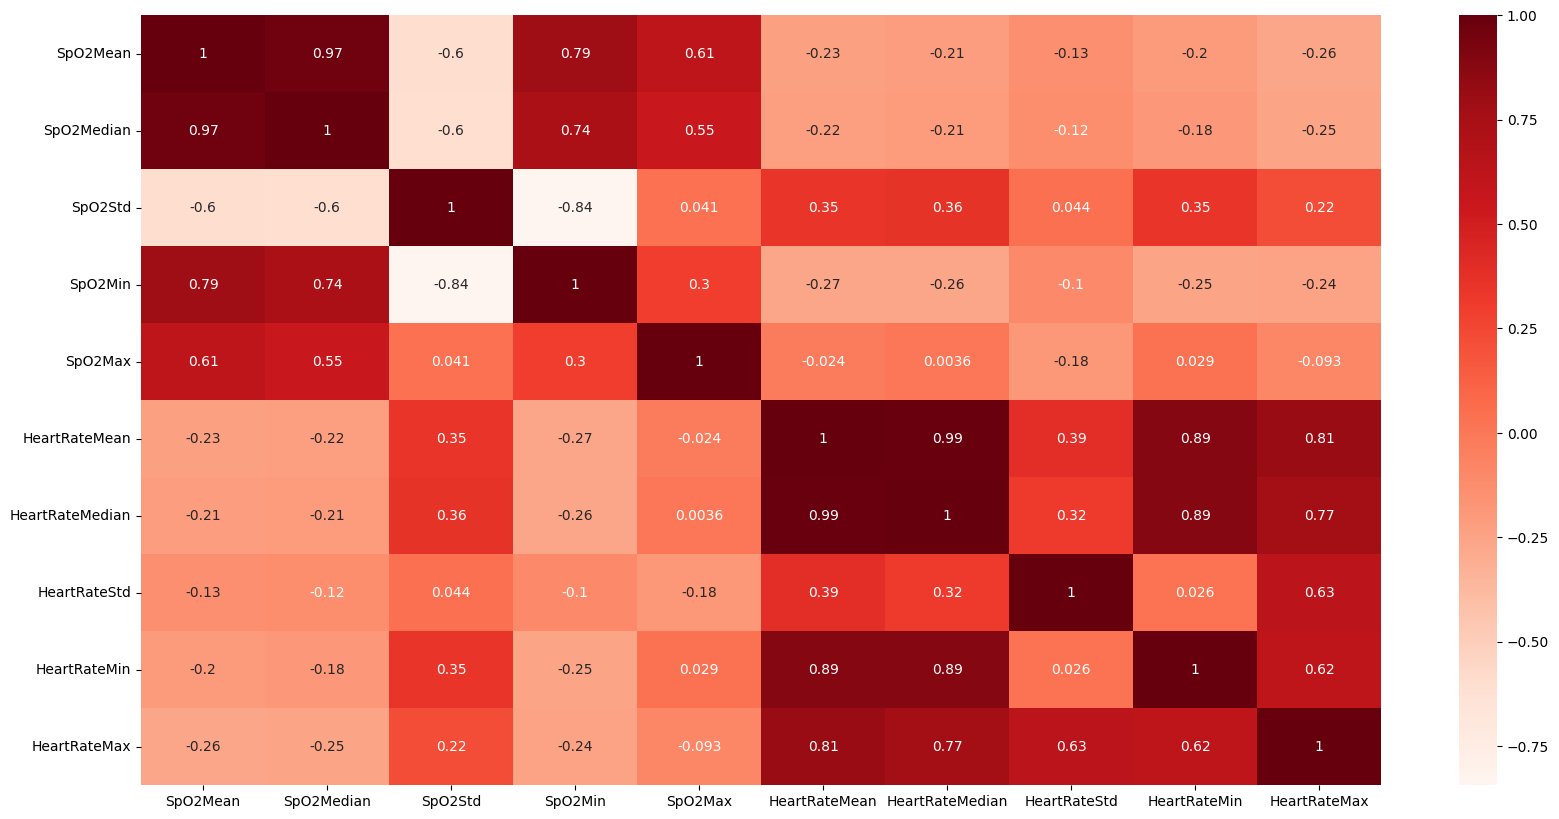

                 SpO2Mean  SpO2Median   SpO2Std   SpO2Min   SpO2Max  \
SpO2Mean         1.000000    0.970033 -0.596768  0.786586  0.613258   
SpO2Median       0.970033    1.000000 -0.599727  0.737044  0.549039   
SpO2Std         -0.596768   -0.599727  1.000000 -0.843755  0.041267   
SpO2Min          0.786586    0.737044 -0.843755  1.000000  0.300529   
SpO2Max          0.613258    0.549039  0.041267  0.300529  1.000000   
HeartRateMean   -0.226433   -0.221747  0.349264 -0.267342 -0.023744   
HeartRateMedian -0.210908   -0.208139  0.359423 -0.264385  0.003624   
HeartRateStd    -0.132715   -0.121594  0.044390 -0.103155 -0.178154   
HeartRateMin    -0.196541   -0.181976  0.349672 -0.248954  0.029050   
HeartRateMax    -0.260918   -0.247094  0.223928 -0.241003 -0.092711   

                 HeartRateMean  HeartRateMedian  HeartRateStd  HeartRateMin  \
SpO2Mean             -0.226433        -0.210908     -0.132715     -0.196541   
SpO2Median           -0.221747        -0.208139     -0.12159

In [61]:
features.Label = features.Label.str.replace('Relax1', 'Relax')

X = features.drop('Label', axis=1)
X = X.drop('Subject ID', axis=1)

cor = X.corr()
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

correlations = X.corr()
print(correlations)

### Removing Strong Correlated Features 

In [89]:
features

,Subject ID,Label,SpO2_mean,SpO2_median,SpO2_std,SpO2_amin,SpO2_amax,HeartRate_mean,HeartRate_median,HeartRate_std,HeartRate_amin,HeartRate_amax
0,Subject 1,CognitiveStress,96.197260,96.0,0.729664,95.0,98.0,83.616438,82.0,5.029665,76.0,102.0
1,Subject 1,EmotionalStress,95.616915,95.0,0.828129,94.0,99.0,78.708955,76.0,7.063119,72.0,101.0
2,Subject 1,PhysicalStress,96.416413,96.0,0.780774,95.0,98.0,96.003040,97.0,12.075347,72.0,117.0
3,Subject 1,Relax,95.639235,96.0,0.853411,93.0,98.0,79.070657,77.0,9.315107,66.0,127.0
4,Subject 10,CognitiveStress,96.727528,97.0,0.577928,95.0,98.0,81.536517,81.0,3.392006,75.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Subject 8,Relax,95.114713,95.0,0.371812,94.0,97.0,90.502078,90.0,4.134263,82.0,114.0
76,Subject 9,CognitiveStress,95.619718,96.0,1.880364,89.0,98.0,89.135211,88.0,2.852053,84.0,97.0
77,Subject 9,EmotionalStress,96.022444,96.0,1.063953,93.0,99.0,77.478803,76.0,5.450704,72.0,96.0
78,Subject 9,PhysicalStress,95.118902,96.0,2.032129,90.0,98.0,99.076220,97.0,11.323313,87.0,125.0


In [88]:
features = features.drop('SpO2Mean', axis = 1)
features = features.drop('SpO2Std', axis = 1)
features = features.drop('HeartRateMean', axis = 1)
features = features.drop('HeartRateStd', axis = 1)

KeyError: "['SpO2Mean'] not found in axis"

In [62]:
features

,Subject ID,Label,SpO2Mean,SpO2Median,SpO2Std,SpO2Min,SpO2Max,HeartRateMean,HeartRateMedian,HeartRateStd,HeartRateMin,HeartRateMax
0,Subject 1,CognitiveStress,96.197260,96.0,0.729664,95.0,98.0,83.616438,82.0,5.029665,76.0,102.0
1,Subject 1,EmotionalStress,95.616915,95.0,0.828129,94.0,99.0,78.708955,76.0,7.063119,72.0,101.0
2,Subject 1,PhysicalStress,96.416413,96.0,0.780774,95.0,98.0,96.003040,97.0,12.075347,72.0,117.0
3,Subject 1,Relax,95.639235,96.0,0.853411,93.0,98.0,79.070657,77.0,9.315107,66.0,127.0
4,Subject 10,CognitiveStress,96.727528,97.0,0.577928,95.0,98.0,81.536517,81.0,3.392006,75.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Subject 8,Relax,95.114713,95.0,0.371812,94.0,97.0,90.502078,90.0,4.134263,82.0,114.0
76,Subject 9,CognitiveStress,95.619718,96.0,1.880364,89.0,98.0,89.135211,88.0,2.852053,84.0,97.0
77,Subject 9,EmotionalStress,96.022444,96.0,1.063953,93.0,99.0,77.478803,76.0,5.450704,72.0,96.0
78,Subject 9,PhysicalStress,95.118902,96.0,2.032129,90.0,98.0,99.076220,97.0,11.323313,87.0,125.0


In [103]:
from sklearn.preprocessing import LabelEncoder
label_mapping = {'Relax': 0, 'EmotionalStress': 1, 'CognitiveStress': 2, 'PhysicalStress': 3}
labels_mapped = df['Label'].map(label_mapping)

In [63]:
X = features.drop('Label', axis=1)
X = X.drop('Subject ID', axis=1)
y = features['Label']

In [12]:
df['Index'] = df['Index'].str.replace('Subject', '')

In [120]:
X = df.drop('Label', axis=1)

In [139]:
X = df.drop('Subject ID', axis=1)


In [132]:
X = df.drop('Index', axis=1)

In [141]:
X = df.drop(['Label', 'Subject ID'], axis=1)


In [142]:
X

,Hour,Minute,Second,HeartRate,SpO2,Index
0,15.0,8.0,28.0,96.0,97.0,1015828
1,15.0,8.0,29.0,96.0,96.0,1015829
2,15.0,8.0,30.0,97.0,96.0,1015830
3,15.0,8.0,31.0,96.0,96.0,1015831
4,15.0,8.0,32.0,96.0,96.0,1015832
...,...,...,...,...,...,...
46224,14.0,53.0,51.0,74.0,95.0,9145351
46225,14.0,53.0,52.0,74.0,95.0,9145352
46226,14.0,53.0,53.0,74.0,95.0,9145353
46227,14.0,53.0,54.0,74.0,95.0,9145354


In [1]:
df.replace(to_replace="male", value=0, inplace=True)
df.replace(to_replace="female", value=1, inplace=True)

NameError: name 'df' is not defined

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print(X_train)  
print(y_train)

     SpO2Mean  SpO2Median   SpO2Std  SpO2Min  SpO2Max  HeartRateMean  \
38  96.522796        96.0  0.736834     95.0     99.0      87.477204   
2   96.416413        96.0  0.780774     95.0     98.0      96.003040   
35  94.725914        95.0  1.158851     91.0     98.0      61.770764   
33  96.940150        97.0  1.073037     94.0     98.0      66.850374   
45  95.617073        97.0  2.530441     89.0     99.0      92.368293   
..        ...         ...       ...      ...      ...            ...   
75  95.114713        95.0  0.371812     94.0     97.0      90.502078   
9   94.613497        95.0  0.805703     93.0     97.0      76.736196   
72  95.788732        96.0  0.484666     95.0     97.0      98.783099   
12  96.890141        97.0  0.522693     96.0     98.0      65.081690   
37  97.396509        98.0  0.921894     95.0     99.0      63.493766   

    HeartRateMedian  HeartRateStd  HeartRateMin  HeartRateMax  
38             82.0     16.814998          57.0         112.0  
2      

### Dimentioanl Reduction

In [22]:
subject10 = total_data[total_data['Subject ID']=='Subject 10']
f_names = subject10[ subject10['Label'] == 'Relax2' ].index
subject10.drop(f_names, inplace = True)
f_names = subject10[ subject10['Label'] == 'Relax3' ].index
subject10.drop(f_names, inplace = True)
f_names = subject10[ subject10['Label'] == 'Relax4' ].index
subject10.drop(f_names, inplace = True)
subject10.Label = subject10.Label.str.replace('Relax1', 'Relax')

C:\Users\pojit\AppData\Local\Temp\ipykernel_29768\2480580185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject10.drop(f_names, inplace = True)
C:\Users\pojit\AppData\Local\Temp\ipykernel_29768\2480580185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject10.drop(f_names, inplace = True)
C:\Users\pojit\AppData\Local\Temp\ipykernel_29768\2480580185.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject10.drop(f_nam

In [44]:
subject10X = subject10.drop('Index', axis = 1)
subject10X = subject10.drop('Label', axis = 1)
subject10X = subject10X.drop('Hour', axis = 1)
subject10X = subject10X.drop('Minute', axis = 1)
subject10X = subject10X.drop('Second', axis = 1)
subject10X = subject10X.drop('Subject ID', axis = 1)


In [47]:
subject10X['Index'] = subject10X['Index'].str.replace('Subject', '')

In [48]:
subject10X

,HeartRate,SpO2,Index
2299,96.0,97.0,1015828
2300,96.0,96.0,1015829
2301,97.0,96.0,1015830
2302,96.0,96.0,1015831
2303,96.0,96.0,1015832
...,...,...,...
4580,74.0,96.0,10154924
4581,70.0,96.0,10154925
4582,69.0,96.0,10154926
4583,68.0,96.0,10154927


In [25]:
from sklearn.preprocessing import StandardScaler

In [49]:
standardized_10X = StandardScaler().fit_transform(subject10X)

In [50]:
subject10_labels = subject10['Label']
subject10_labels = subject10_labels.reset_index()

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standardized_10X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

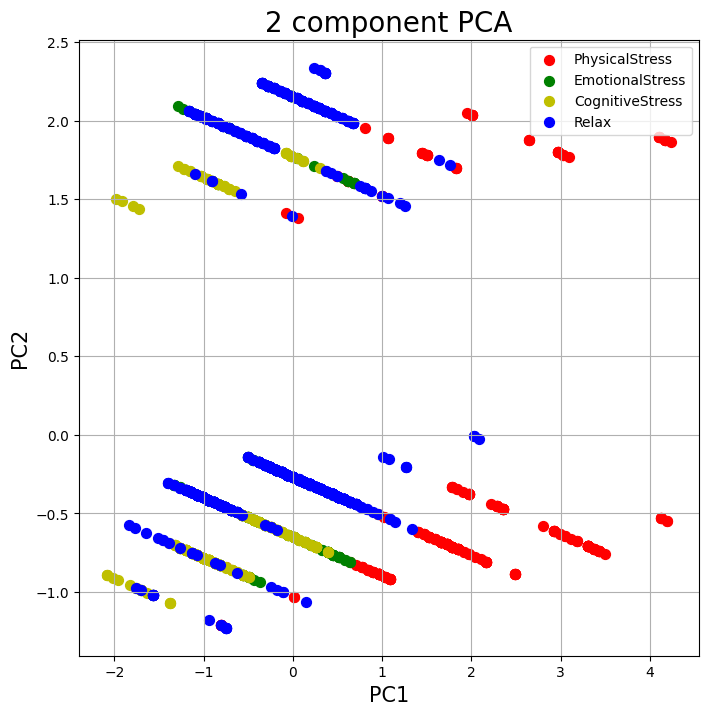

In [53]:
finalDF = pd.concat((principalDF, subject10_labels), axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = set(subject10['Label'])
colors = ['r', 'g', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Label'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [61]:
import plotly.express as px
from sklearn.manifold import TSNE
from IPython.display import Image
from bioinfokit.visuz import cluster

C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2286 samples in 0.001s...
[t-SNE] Computed neighbors for 2286 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2286
[t-SNE] Computed conditional probabilities for sample 2000 / 2286
[t-SNE] Computed conditional probabilities for sample 2286 / 2286
[t-SNE] Mean sigma: 0.000110
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.775196
[t-SNE] KL divergence after 1000 iterations: 0.083731


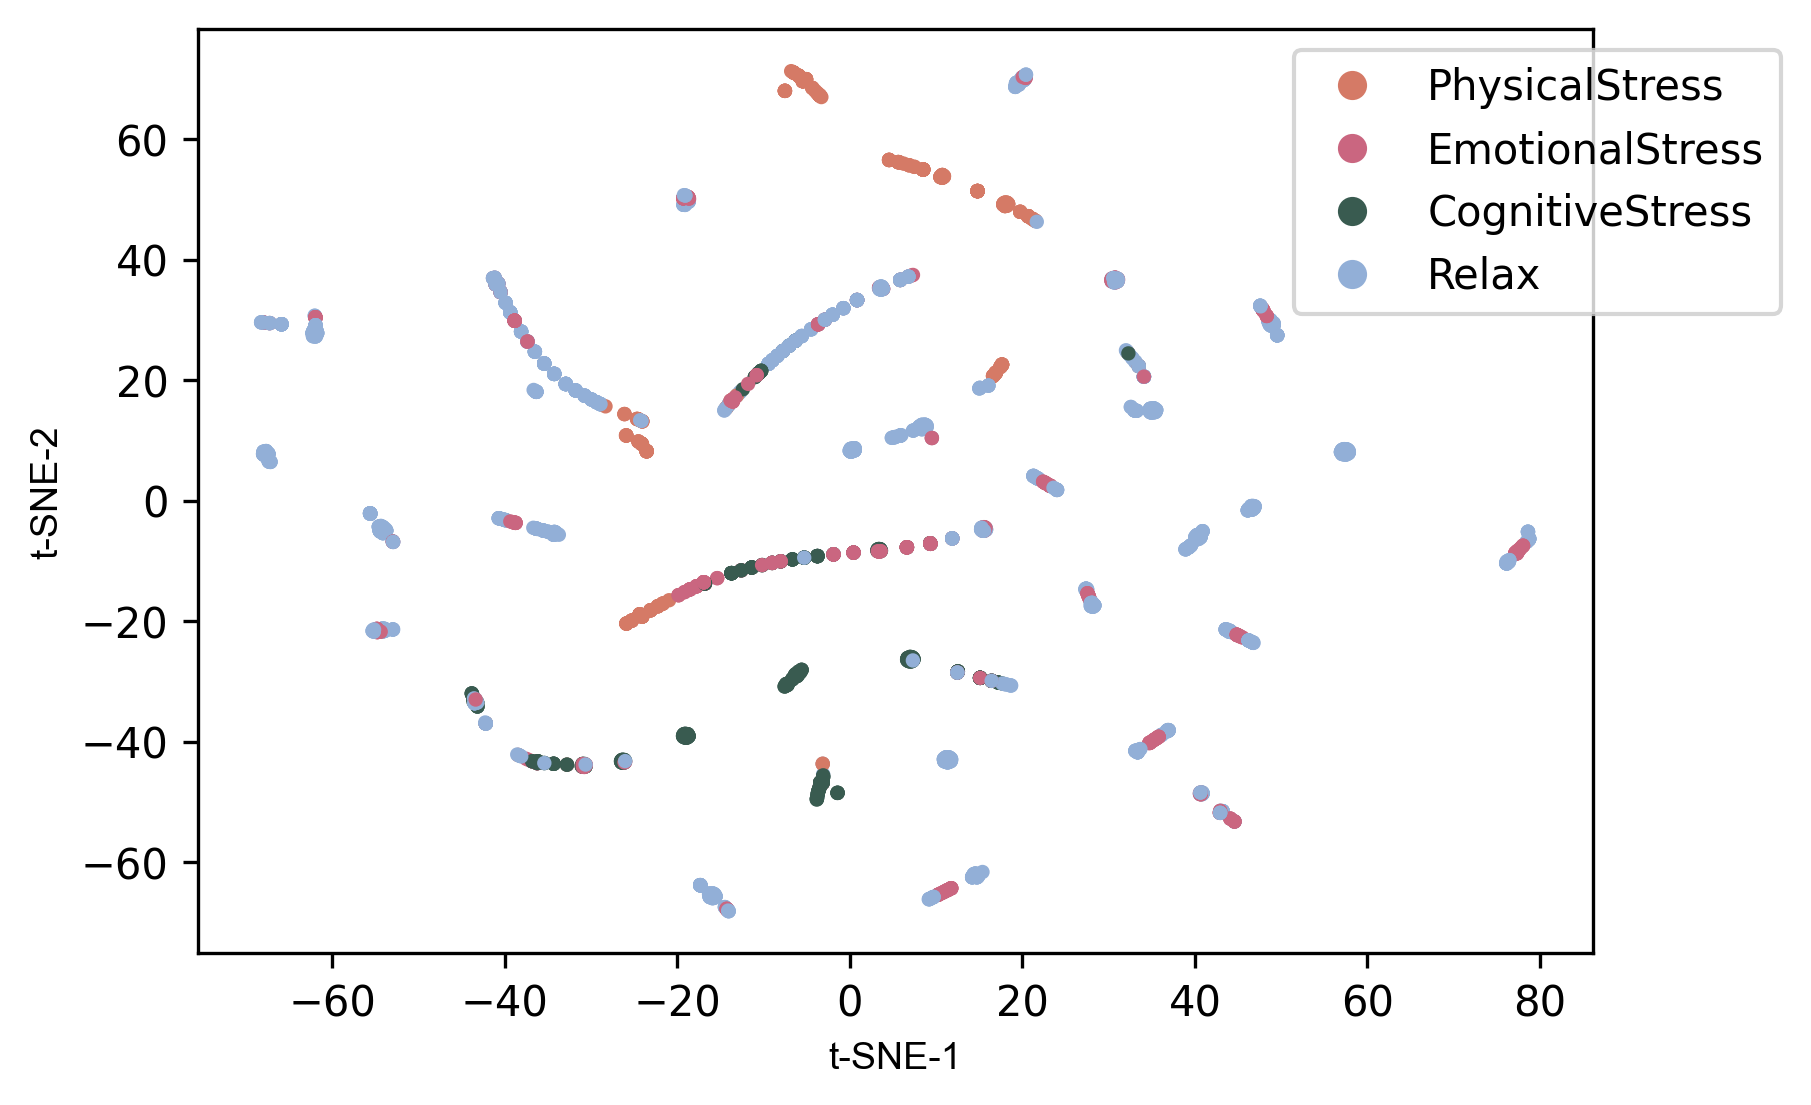

In [62]:
ax.legend(targets)
ax.grid()

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(standardized_10X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(
    principalComponents, x=0, y=1, z=2, color=subject10['Label'],
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(standardized_10X)
cluster.tsneplot(score=tsne_em)
color_class = subject10['Label'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, colordot=('#d57a66', '#ca6680', '#395B50', '#92AFD7'), legendpos='upper right', legendanchor=(1.15, 1) )

Image(filename='tsne_2d.png') 

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
rfc = RandomForestClassifier(random_state=1, n_estimators=10000, max_depth=15)

sklearn_selector = RFE(rfc, n_features_to_select=6)
X_trans = sklearn_selector.fit_transform(X_train, y_train)

print("Ranking: ", sklearn_selector.ranking_)

selected_features = pd.DataFrame({'Feature': list(X_train.columns),
                                     'Ranking': sklearn_selector.ranking_})

print("\nSelected Features")
print(selected_features.sort_values(by='Ranking').head(n=6))

X_important_train = sklearn_selector.transform(np.array(X_train))
X_important_test = sklearn_selector.transform(np.array(X_test))


rf_sklearn = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=15)
rf_sklearn.fit(X_important_train, y_train)

print("\nAccuracy Score")
accuracy_score(y_test, rf_sklearn.predict(X_important_test))

Ranking:  [1 4 1 3 5 1 1 1 2 1]

Selected Features
           Feature  Ranking
0         SpO2Mean        1
2          SpO2Std        1
5    HeartRateMean        1
6  HeartRateMedian        1
7     HeartRateStd        1
9     HeartRateMax        1


C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
C:\Users\pojit\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(



Accuracy Score


0.5625

In [99]:
features

,Subject ID,Label,SpO2_mean,SpO2_median,SpO2_std,SpO2_amin,SpO2_amax,HeartRate_mean,HeartRate_median,HeartRate_std,HeartRate_amin,HeartRate_amax
0,Subject 1,CognitiveStress,96.197260,96.0,0.729664,95.0,98.0,83.616438,82.0,5.029665,76.0,102.0
1,Subject 1,EmotionalStress,95.616915,95.0,0.828129,94.0,99.0,78.708955,76.0,7.063119,72.0,101.0
2,Subject 1,PhysicalStress,96.416413,96.0,0.780774,95.0,98.0,96.003040,97.0,12.075347,72.0,117.0
3,Subject 1,Relax,95.639235,96.0,0.853411,93.0,98.0,79.070657,77.0,9.315107,66.0,127.0
4,Subject 10,CognitiveStress,96.727528,97.0,0.577928,95.0,98.0,81.536517,81.0,3.392006,75.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,Subject 8,Relax,95.114713,95.0,0.371812,94.0,97.0,90.502078,90.0,4.134263,82.0,114.0
76,Subject 9,CognitiveStress,95.619718,96.0,1.880364,89.0,98.0,89.135211,88.0,2.852053,84.0,97.0
77,Subject 9,EmotionalStress,96.022444,96.0,1.063953,93.0,99.0,77.478803,76.0,5.450704,72.0,96.0
78,Subject 9,PhysicalStress,95.118902,96.0,2.032129,90.0,98.0,99.076220,97.0,11.323313,87.0,125.0


In [69]:

features['Subject ID'].value_counts()

Subject 1     4
Subject 10    4
Subject 8     4
Subject 7     4
Subject 6     4
Subject 5     4
Subject 4     4
Subject 3     4
Subject 20    4
Subject 2     4
Subject 19    4
Subject 18    4
Subject 17    4
Subject 16    4
Subject 15    4
Subject 14    4
Subject 13    4
Subject 12    4
Subject 11    4
Subject 9     4
Name: Subject ID, dtype: int64

In [16]:
features.to_csv('D:\\BCU Final\\ML\\Dataset\\NON EEG\\mergeddata\\features3.csv', index=False) 